<a href="https://colab.research.google.com/github/sgrubas/cats/blob/main/tutorials/DetectionTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Earthquake detection via Cluster Analysis of Trimmed Spectrogram (CATS)

This notebook explains the usage of the CATS detector.

A minimalistic example would look like this:

```python
data = import_sample_data()
detector = cats.CATSDetector(**parameters)
result = detector.detect(data)
result.plot((1, 2))
```

Below is more detailed explanation. 

# Content

This notebook covers some of the principles of CATS and its extensions:

1. [CATS Detector](#CATS-Detector) - explains how to start, parameters, and outputs.
2. [Joint processing of three-component data](#Joint-processing-of-three-component-data)
3. [Multi-trace detection and voting](#Multi-trace-detection-and-voting)
4. [Cluster catalogs](#Cluster-catalogs) - more details on working with time-frequency attributes of labeled clusters
5. [Pre-tuned CATS models](#Pre-tuned-CATS-models)

# Installation

Uncomment and execute the cell to install CATS

In [1]:
# pip install git+https://github.com/sgrubas/cats.git

# Imports

In [2]:
import numpy as np
import holoviews as hv

First import may make up to 3-5 mins due to JIT compiled functions, but next time they will be cached and import will be faster ~10-20 secs

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
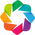

In [3]:
import cats

<hr>

# Import of synthetic dataset

Basically, we may have any number of traces/receivers and components so that shape of the data can be arbitrary, including only one trace `(N,)`. 

But in this example, we will consider multiple 3-component receivers

**Note**, the API supports data format in `numpy.ndarray` or `obspy.Stream`.

In [4]:
data = cats.import_sample_data()

Dclean = data['data']
time = data['time']  # time
dt = data['dt']      # sampling time
x = data['x']        # location of recievers 
dimensions = ["Component", "Receiver", "Time"]

In [5]:
print(f"Input dataset shape\t=\t{Dclean.shape}")
print(f"Dimensions correspond to\t{dimensions}")
print(*[f"{dim} : {shp}" for dim, shp in zip(dimensions, Dclean.shape)], sep='\t')

Input dataset shape	=	(3, 10, 70000)
Dimensions correspond to	['Component', 'Receiver', 'Time']
Component : 3	Receiver : 10	Time : 70000


In [6]:
# contamination with white gaussian noise
np.random.seed(132)
noise_scale = 0.1
Noise = np.random.randn(*Dclean.shape) * noise_scale   # colored noise
Noise += noise_scale * np.sin(time * 2 * np.pi * 50)[None, None, :]  # constant electric 50 Hz noise
D = Dclean + Noise

# CATS Detector

## Parameters

Detector is implemented as operator `cats.CATSDetector(parameters)`

Data parameters:

0. `dt_sec`                 - sampling time in **seconds**
1. `name`                   - defines the operator's name, default `'CATS'`

Main parameters:

1. `stft_window_type`       - type of STFT window like 'hann' or 'hamming'. See also `scipy.signal.get_window()` for more windows
1. `stft_window_sec`        - length of STFT window in **seconds**
2. `stft_overlap`           - overlap rate of STFT windows, range (0, 1) (e.g. `0.5` is 50%)
3. `minSNR`                 - minimum Signal-to-Noise Ratio, range ~ (4 - 12), used to estimate noise standard deviation
4. `stationary_frame_sec`   - frame length where noise is stationary, in **seconds**
5. `cluster_size_t_sec`     - minimum cluster size in time or **minimum time duration** of strongest phases in signal, in **seconds**
6. `cluster_size_f_Hz`      - minimum cluster size in frequency in **hertz** (frequency width of signal),
7. `cluster_size_f_octaves` - minimum cluster size in frequency in **octaves** (log2 scale). If > 0, it supersedes `cluster_size_f_Hz`. Default `-1`
8. `cluster_distance_t_sec`  - neighborhood distance for clustering in time or **minimum separation time** between different events, in **seconds**
9. `cluster_distance_f_Hz`   - neighborhood distance for clustering in frequency (minimum separation in frequency), in **hertz**
10. `cluster_distance_f_octaves`   - neighborhood distance for clustering in frequency in **octaves**. If > 0, it supersedes `cluster_distance_f_Hz`. Default `-1`
11. `freq_bandpass_Hz`        - bandpass frequencies in Hz (e.g. (5, 50)), everything outside will be zeroed.

Multi-component extension parameters (see more in Section **[Joint processing of three-component data](#Joint-processing-of-three-component-data)**):
1. `aggr_clustering_axis`  - axis of array where components are placed, enables multi-component masking, e.g. for 3C data with shape (3, 10, 5000), this would be `0` as components are on the 0th axis. Default `None`, not applied.

Multi-trace extension parameters (see more in Section **[Multi-trace detection and voting](#Multi-trace-detection-and-voting)**):
1. `clustering_multitrace`   - multitrace clustering, `True/False`, can improve precision for arrays of receivers, default `False`
3. `cluster_size_trace`      - minimum number of traces for multitrace clustering, {1, 2, ...} (e.g. `2`)
4. `cluster_distance_trace`  - neighborhood distance for connecting traces, {1, 2, ...} (e.g. `2`)

Cluster catalog parameters (see more in Section **[Cluster catalogs](#Cluster-catalogs)**):
1. `cluster_catalogs_funcs`  - list of functions calculating time-frequency attributes 
2. `cluster_feature_distributions` - list of distributions that can be used for time-frequency attributes calculation (e.g. `["spectrogram", "spectrogram_SNR", "coefficients"]`)
3. `cluster_catalogs_opts`     - secondary options for the cluster catalog calculation
4. `cluster_catalogs_filter`   - function that can filter cluster catalog by some time-frequency attributes (e.g. `catalog.Frequency_peak_Hz > 15`)

Additional STFT parameters:
1. `stft_nfft`       - zero-padding for STFT windows, recommended a power of 2 (e.g. `512`). Default is closest power of 2, bigger than the window.  
2. `stft_backend`    - backend for computing STFT, available are `['ssqueezepy', 'ssqueezepy_gpu', 'scipy']`. Default `ssqueezepy` as the fastest; GPU acceleration is available via 'ssqueezepy_gpu' and requires GPU drivers for PyTorch.
3. `stft_kwargs`     - additional parameters for `cats.timefrequency.STFTOperator`

Additional parameters for noise estimation of BEDATE:
1. `bedate_freq_grouping_Hz`       - width in **Hz** to group frequency bins for joint noise estimation 
2. `bedate_freq_grouping_octaves`  - width in **octaves** to group frequency bins for joint noise estimation. If > 0, it supersedes `bedate_freq_grouping_Hz`, default `-1`.
3. `date_Q`  - a constant defining the number of elements with low magnitude to not use for noise estimation, based on using Bienayme-Chebyshev's inequality (DATE algorithm)
4. `date_Nmin_percentile`  - a fraction of elements with low magnitude to not use for noise estimation (DATE algorithm). It supersedes `date_Q`
5. `date_original_mode`  - whether to use the original mode of DATE, default `False`. If `True`, it is prone to underestimate noise level when no signal is present.

Phase separation parameters (details will be added later)
1. `phase_separation` - a function that can separate a single cluster into many different based on a time-frequency distribution. 

In [7]:
detector = cats.CATSDetector(dt_sec=dt,
                             stft_window_type='hann',
                             stft_window_sec=0.5, 
                             stft_overlap=0.8,
                             minSNR=5.5,
                             stationary_frame_sec=200,
                             cluster_size_t_sec=0.2,
                             cluster_size_f_Hz=10,
                             cluster_distance_t_sec=0.2,
                             cluster_distance_f_Hz=2)

The instantiated `detector` has four main methods:
1. `.detect` - performs the detection of events
2. `.detect_to_file` - performs the detection and saves to a file
3. `.detect_on_files` - performs the detection by reading from files and saving to files
4. `.STFT` - link to the corresponding STFT operator, see more in `cats.STFTOperator(...)` 

As well, all the input paramaters such as `stationary_frame_sec`, `cluster_size_t_sec`, `cluster_size_f_Hz`, etc., are used to calculate indexed lengths `stationary_frame_len`, `cluster_size_t_len`, `cluster_size_f_len`, etc., according to the given samplings `dt_sec`, `stft_overlap`, and `stft_nfft`.

**Note**, other properties can be viewed via `.dict()`

To save figure, we need to use `hv.save(...)`

In [8]:
# dpi - increases resolution but slower to save and bigger file

# hv.save(fig_noise_psd, "../fig_noise_psd_sample.png", dpi=100)  

## Applying CATS Detector

To apply the detection, we need to pass the input data `x` to the function `detector.detect(x)`.

```python
detector.detect(
               x,  # input data (numpy.ndarray), the last axis is time
               verbose,  # True/False, print status messages (stages and timing)
               full_info, # True/False/'qc', save intermediate steps for quality control
               )
```

`x` is `numpy.ndarray` and may have any number of dimensions with shape `(..., N)`, but the last axis `N` must be Time.

In [9]:
print(D.shape)

(3, 10, 70000)


In [10]:
result = detector.detect(D, verbose=True, full_info=True)

1. STFT	...	Completed in 0.228 sec
2. B-E-DATE trimming	...	Completed in 0.0585 sec
3. Clustering	...	Completed in 0.00622 sec
4. Cluster catalog	...	Completed in 0.0402 sec
5. Projecting intervals	...	Completed in 0.0199 sec
Total elapsed time:	0.352 sec



The result of detection is written to `cats.CATSDetectionResult` object for convenience of looking at the results on each step of the detection. 

It has several attributes:
1. `.signal`  -  original input signal `x`, shape `(..., N)`
2. `.coefficients`  -  result of STFT transform, complex-valued coefficients, shape `(..., Nf, Nt)`, where `Nf` number of frequencies, `Nt` number of time samples after STFT
3. `.spectrogram`  -  absolute value of complex-valued `.coefficients`, shape `(..., Nf, Nt)`
4. `.time_frames`  -  time frames of where noise is assumed to be stationary, shape `(nt, 2)`, `[[frame1_start, frame1_end], ...]`, where `nt` is number of stationary time frames
5. `frequency_groups_indexes`  -  frequency groups that were processed in B-E-DATE for noise estimation together, shape `(gNf, 2)`, where `gNf` number of frequency groups
5. `.noise_std`  -  noise standard deviation as a function of time and frequency, shape `(..., gNf, nt)`
6. `.noise_threshold_conversion`  -  converions constants from `noise_std` to actual thresholds `(gNf,)`
7. `.spectrogram_SNR`  -  spectrogram of SNR values, shape `(..., Nf, Nt)`
8. `.spectrogram_trim_mask`  -  binary mask for trimming spectrogram, obtained from BEDATE, shape `(..., Nf, Nt)`
9. `.spectrogram_trim_mask_aggr`  -  aggregated binary mask for trimming spectrogram for multi-component data. If shape of `x` was `(Nc, Nr, N)`, it has shape `(1, Nr, Nf, Nt)`, unlike `.spectrogram_trim_mask` of shape `(Nc, Nr, Nf, Nt)`.
10. `.spectrogram_SNR_clustered`  -  clustered trimmed SNR spectrogram, shape `(..., Nf, Nt)`
11. `.spectrogram_event_ID`  -  cluster indexes of `.spectrogram_SNR_clustered`, shape `(..., Nf, Nt)`
12. `.spectrogram_cluster_ID`  -  alias of cluster `.spectrogram_event_ID`. But after phase separation, they are different.
13. `.cluster_catalogs`  -  dataframe with time-frequency attributes for each detected cluster.
14. `.detection`  -  detection result as a binary projection of clusters onto time domain, shape `(..., Nt)`, wherein `1` is seismic event, `0` is noise
15. `.likelihood`  -  likelihood curve obtained by projecting `.spectrogram_SNR_clustered` onto time, shape `(..., Nt)`
16. `.detected_intervals`  -  detected intervals from `.detection`, but now it is array of `[time_begin, time_end]`
18. `.frequencies`  -  frequency axis of STFT `(Nf,)`
19. `.minSNR` - minimum Signal-to-Noise Ratio used in detection
20. `.dt_sec` - sampling in seconds of the input `signal` 
21. `.tf_dt_sec` - sampling in seconds of the STFT operator
22. `.tf_t0_sec` - starting time of performed STFT, almost always `0` but rarely ~`-tf_dt_sec`
23. `.time_npts` - number of time points of the input `signal` -> `N`
10. `.tf_time_npts` - number of time points after the STFT -> `Nt`
21. `.history` - recorded timing of each processing stage (in seconds)
22. `.time()` - function, giving original time axis in seconds `(N,)`
23. `.tf_time()`  -  function, giving time axis after STFT in seconds `(Nt,)`

Additionally:
- `.save(filename)` - to save the result as PICKLE file (via pickle)
- `.load(filename)` - to load a saved result from PICKLE file (via pickle)

To save the results with all the info we specified in `full_info` argument, use `save` method.

In [11]:
result.save("test_save")

We can also import a saved result via `cats.CATSDetectionResult.load`

In [12]:
result = cats.CATSDetectionResult.load("test_save.pickle")

Each attribute can be accessed as follows:

In [13]:
# in seconds
result.time_frames

array([[  0.        , 136.73995599]])

In [14]:
# print the detection result on 'Z' component of 4th trace and associated time indexes

sample_ind = (2, 4)  # comp 2 - 'Z' and 5th receiver (indexing from 0)
result.detected_intervals[sample_ind], result.tf_time()

(array([[123.07611937, 124.3967876 ],
        [  9.80342181,  11.22567989],
        [ 50.03300767,  51.76003535],
        [ 16.81312237,  17.42266155],
        [  3.80961987,   4.72392864]]),
 array([0.00000000e+00, 1.01589863e-01, 2.03179727e-01, ...,
        1.36536776e+02, 1.36638366e+02, 1.36739956e+02]))

If we need only time intervals, we can look at the extracted time intervals

In [15]:
result.detected_intervals[sample_ind]  # in seconds

array([[123.07611937, 124.3967876 ],
       [  9.80342181,  11.22567989],
       [ 50.03300767,  51.76003535],
       [ 16.81312237,  17.42266155],
       [  3.80961987,   4.72392864]])

### Clusters catalog
From the detected events, we can retrieve a catalog of their cluster features.

In [16]:
result.cluster_catalogs

Event_ID  Cluster_ID  Time_start_sec  Time_end_sec  \
Trace_dim_0 Trace_dim_1                                                       
0           0                   1           1       15.492784     16.000082   
            0                   2           2      105.196352    105.501024   
            0                   3           3       82.237057     82.643291   
            1                   1           1       51.658545     53.690147   
            1                   2           2       10.515035     11.326816   
...                           ...         ...             ...           ...   
2           8                   4           4        4.928124      5.230901   
            9                   1           1       49.626752     51.048805   
            9                   2           2      122.771392    123.584027   
            9                   3           3       11.429305     12.139565   
            9                   4           4       17.016603     17.523958   

                         Time_peak_sec  Frequency_start_Hz  Frequency_end_Hz  \
Trace_dim_0 Trace_dim_1                                                        
0           0                15.746429            5.998384         19.994613   
            0               105.348688          203.945052        213.942359   
            0                82.389379          209.943436        217.941282   
            1                52.217190            0.000000         11.996768   
            1                10.666936            3.998923         11.996768   
...                                ...                 ...               ...   
2           8                 5.079493           79.978452         87.976297   
            9                49.880623            0.000000         11.996768   
            9               123.126914            0.000000          9.997306   
            9                11.682834            5.998384         13.996229   
            9                17.371867           99.973065        107.970910   

                         Frequency_peak_Hz  Energy_peak  Energy_mean  \
Trace_dim_0 Trace_dim_1                                                
0           0                    13.996229     6.812304     4.883996   
            0                   205.944514     3.716320     3.523146   
            0                   217.941282     4.171212     3.550797   
            1                     5.998384     9.320030     5.161701   
            1                     5.998384     9.859459     5.324536   
...                                    ...          ...          ...   
2           8                    85.976836     4.167203     3.606102   
            9                     5.998384    26.566648     8.476290   
            9                     3.998923    42.092949    14.550985   
            9                     7.997845     6.044577     4.147384   
            9                   105.971449     3.876836     3.504180   

                         Energy_sum     SNR_sum   SNR_mean   SNR_peak  \
Trace_dim_0 Trace_dim_1                                                 
0           0             97.679924   97.679924   4.883996   6.812304   
            0             24.662020   24.662020   3.523146   3.716320   
            0             24.855576   24.855576   3.550797   4.171212   
            1            289.055237  289.055237   5.161701   9.320030   
            1            122.464333  122.464333   5.324536   9.859459   
...                             ...         ...        ...        ...   
2           8             21.636612   21.636612   3.606102   4.167203   
            9            389.909363  389.909363   8.476290  26.566648   
            9            465.631531  465.631531  14.550985  42.092949   
            9             58.063374   58.063374   4.147384   6.044577   
            9             17.520901   17.520901   3.504180   3.876836   

                         Interval_ID  Interval_start_sec  Interval_en

### Reset parameters
If needed, some parameters can be reset

In [17]:
detector.reset_params(minSNR=6)

## Visualization

### Single trace and workflow steps

Another available option from `cats.CATSDetectionResult` is method `.plot(ind)`. Which can display each step of the detection workflow on a 1D trace indicated by argument `ind` which must be `tuple of ints`.

**Note**, to plot the workflow stages, `full_info` must be `'qc'` or `True` in `.detect(..., full_info='qc')` (`'qc'` is equivalent to `.get_qc_keys()`)

**\*** `'qc'` will save only what is needed for quality control `.plot` function

In [18]:
# to see how `full_info` works
result = detector.detect(D, verbose=True, 
                         full_info='qc'  # to save only necessary stages for quality control plotting
                        )

1. STFT	...	Completed in 0.172 sec
2. B-E-DATE trimming	...	Completed in 0.0512 sec
3. Clustering	...	Completed in 0.00597 sec
4. Cluster catalog	...	Completed in 0.0283 sec
5. Projecting intervals	...	Completed in 0.0209 sec
Total elapsed time:	0.278 sec



In [19]:
# Testing Save and load again
result.save("test_save")
result = cats.CATSDetectionResult.load("test_save.pickle")

In [20]:
# retrieved statistics of clusters 
result.cluster_catalogs.loc[0, 5]  # component 0, station 5

Event_ID  Cluster_ID  Time_start_sec  Time_end_sec  \
Trace_dim_0 Trace_dim_1                                                       
0           5                   1           1       49.931521     51.556756   
            5                   2           2       10.210279     11.123628   
            5                   3           3       17.219779     18.235098   

                         Time_peak_sec  Frequency_start_Hz  Frequency_end_Hz  \
Trace_dim_0 Trace_dim_1                                                        
0           5                51.099701            0.000000         11.996768   
            5                10.565346            1.999461         11.996768   
            5                17.778226            3.998923         23.993536   

                         Frequency_peak_Hz  Energy_peak  Energy_mean  \
Trace_dim_0 Trace_dim_1                                                
0           5                     3.998923    39.854404    11.920083   
            5                     5.998384    15.575294     6.706510   
            5                    15.995690    10.559553     6.484961   

                         Energy_sum     SNR_sum   SNR_mean   SNR_peak  \
Trace_dim_0 Trace_dim_1                                                 
0           5            631.764404  631.764404  11.920083  39.854404   
            5            228.021347  228.021347   6.706510  15.575294   
            5            440.977325  440.977325   6.484961  10.559553   

                         Interval_ID  Interval_start_sec  Interval_end_sec  
Trace_dim_0 Trace_dim_1                                                     
0           5                      3           49.931418         51.556856  
            5                      1           10.209781         11.124090  
            5                      2           17.219482         18.235380

:Layout
   .Curve.A_0_full_stop_Input_data_colon_x_left_parenthesis_t_right_parenthesis                                                                                                                                                                                                   :Curve   [Time]   (Amplitude)
   .QuadMesh.A_1_full_stop_Amplitude_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line                                                                                                                                                 :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_2_full_stop_Trimmed_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_T_left_parenthesis_t_comma_f_right_parenthesis                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_3_full_stop_Clustered_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_reverse_over_tilde_reverse_over_mathcal_left_curly_bracket_A_right_curly_bracket_left_parenthesis_t_comma_f_right_parenthesis :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.A_4_full_stop_Likelihood_and_Detection_colon_reverse_over_mathcal_left_curly_bracket_L_right_curly_bracket_left_parenthesis_t_right_parenthesis_and_reverse_over_tilde_left_curly_bracket_reverse_over_alpha_right_curly_bracket_left_parenthesis_t_right_parenthesis :Overlay
      .Curve.I      :Curve   [Time]   (Likelihood)
      .Rectangles.I :Rectangles   [Time,Likelihood,t2,l2]
      .VLine.I      :VLine   [Time,Likelihood]
      .VLine.II     :VLine   [Time,Likelihood]
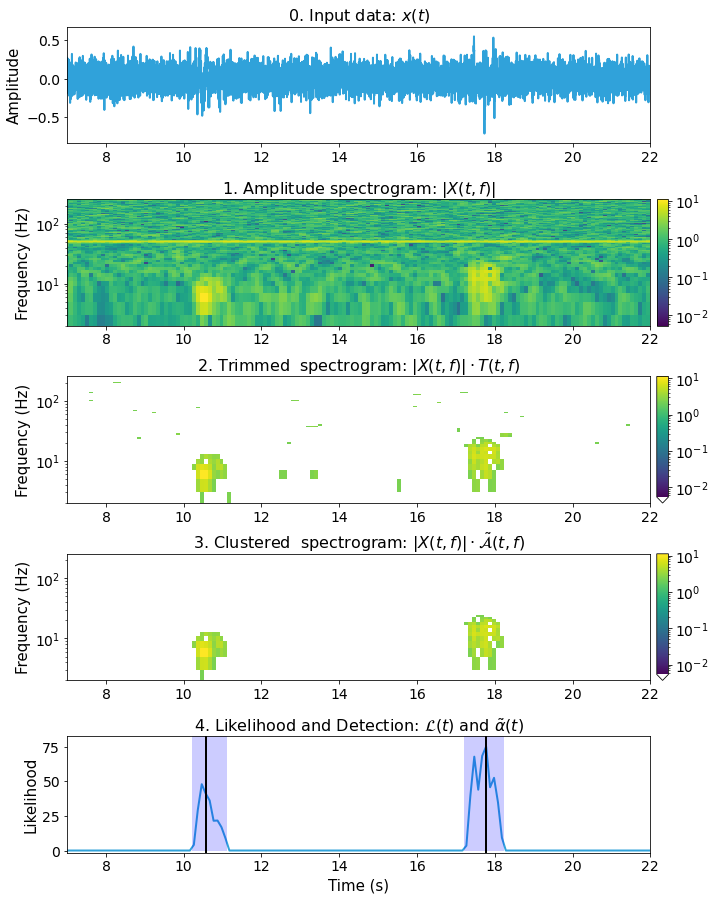

In [21]:
fig = result.plot(ind=(0, 5), time_interval_sec=(7, 22))
fig

In [22]:
# hv.save(fig, 'CATS_detection_demo.png', dpi=250)

### Visualization of the detection result on multiple traces

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
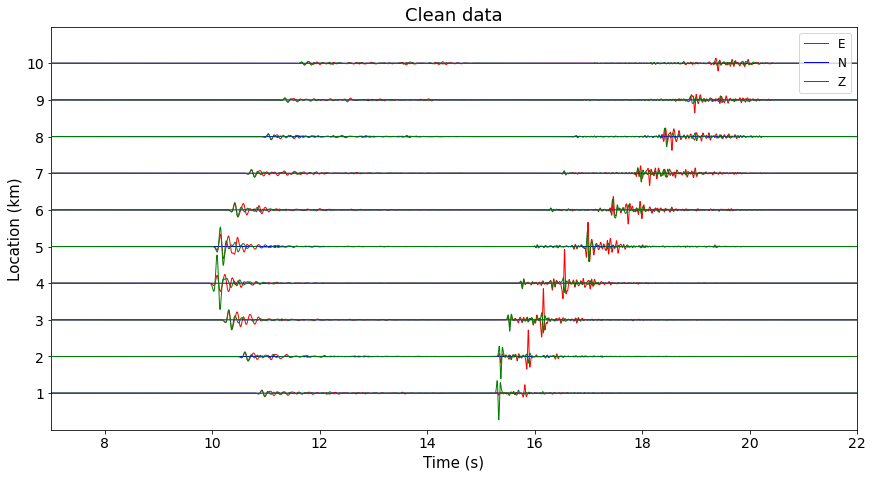

In [23]:
fig = cats.plot_traces(data=Dclean, time=time, time_interval_sec=(7, 22), gain=0.3, per_station_scale=False)
fig = fig.opts(ylabel='Location (km)', title='Clean data')
# hv.save(fig, "../clean_traces_sample.png", dpi=250)  # use this to save figure
fig

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Rectangles.I :Rectangles   [Time,Station,x2,y2]
   .Points.Picks :Points   [Time,Station]
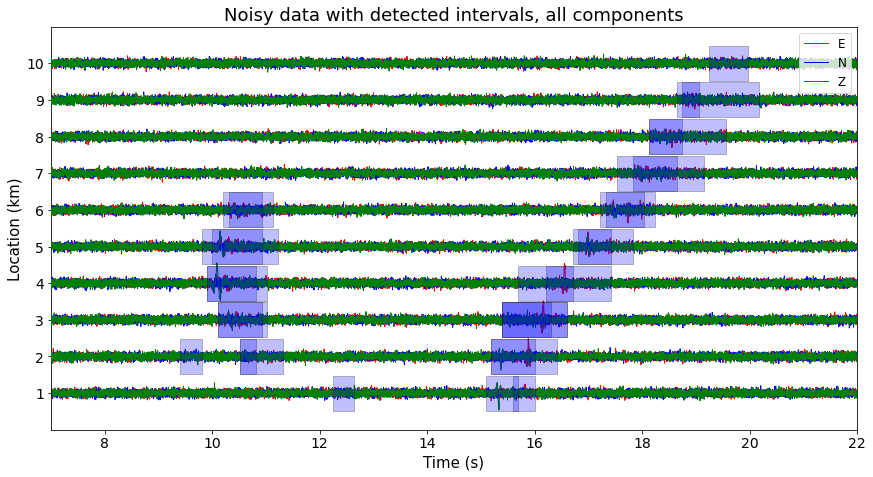

In [24]:
# for plotting traces with the results, we can use the built-in `plot_traces` method of the `result` object
fig = result.plot_traces(intervals=True, time_interval_sec=(7, 22), gain=0.3, alpha=0.25)
fig = fig.opts(ylabel='Location (km)', title='Noisy data with detected intervals, all components')
fig

:Overlay
   .Curve.I      :Curve   [Time]   (Station)
   .Curve.II     :Curve   [Time]   (Station)
   .Curve.III    :Curve   [Time]   (Station)
   .Curve.IV     :Curve   [Time]   (Station)
   .Curve.V      :Curve   [Time]   (Station)
   .Curve.VI     :Curve   [Time]   (Station)
   .Curve.VII    :Curve   [Time]   (Station)
   .Curve.VIII   :Curve   [Time]   (Station)
   .Curve.IX     :Curve   [Time]   (Station)
   .Curve.X      :Curve   [Time]   (Station)
   .Rectangles.I :Rectangles   [Time,Station,x2,y2]
   .Points.Picks :Points   [Time,Station]
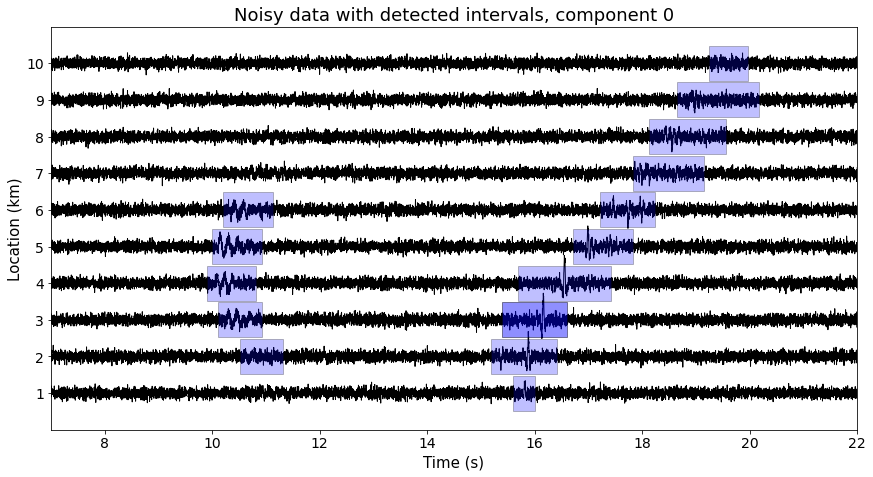

In [25]:
# for plotting traces with the results, we can use the built-in `plot_traces` method of the `result` object
comp = 0
fig = result.plot_traces(ind=comp, intervals=True, time_interval_sec=(7, 22), gain=0.5, alpha=0.25)
fig = fig.opts(ylabel='Location (km)', title=f'Noisy data with detected intervals, component {comp}')
fig

### Auto saving all plots

We can save auto-generated figures based on the position of the detected events

In [26]:
# saves multi traces plots
result.plot_traces_all_segments_to_file(folder_path="D:/TestFigures/",  # path to folder where all figures will be saved
                                        ind=None,  # None -> all traces
                                        segment_separation_sec=3,  # time separation between two displayed events 
                                        segment_extend_time_sec=2,  # adds before & after the event
                                        window_interval_sec=(0, None),  # time window of interest
                                        filename=None,  # prefix for filenames
                                        image_format='png',  # image format ['png', 'pdf', 'svg', 'html', 'gif']
                                        dpi=100,  # resolution, higher takes more time and storage
                                        gain=0.5,
                                        # all other arguments for '.plot_traces' can be specified as well
                                        )

  0%|          | 0/5 [00:00<?, ?it/s]

In [27]:
# saves workflow plots
result.plot_all_segments_to_file(folder_path="D:/TestFigures/",  # path to folder where all figures will be saved
                                 ind=(0, [1, 3]),  # component 0, stations [1, 3]
                                 segment_separation_sec=3,  # time separation between two displayed events 
                                 segment_extend_time_sec=2,  # adds before & after the event
                                 window_interval_sec=(0, 150),  # time window of interest
                                 filename=None,  # prefix for filenames
                                 image_format='png',  # image format ['png', 'pdf', 'svg', 'html', 'gif']
                                 dpi=100,  # resolution, higher takes more time and storage
                                 # all other arguments for '.plot' can be specified as well
                                 )

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
# saves combined workflow plots (for multiple traces in one figure)
result.plot_multi_all_segments_to_file(folder_path="D:/TestFigures/",  # path to folder where all figures will be saved
                                       ind=(None, [2, 7]),  # component None -> all, stations [2, 7]
                                       multi_axis=0,  # data axis along which plots will be combined 
                                       segment_separation_sec=3,  # time separation between two displayed events 
                                       segment_extend_time_sec=2,  # adds before & after the event
                                       window_interval_sec=(0, 50),  # time window of interest
                                       filename=None,  # prefix for filenames
                                       image_format='png',  # image format ['png', 'pdf', 'svg', 'html', 'gif']
                                       dpi=100,  # resolution, higher takes more time and storage
                                       # all other arguments for '.plot_multi' can be specified as well
                                       )

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

<hr>

# Joint processing of three-component data

CATS can process multi-component jointly by combining energy information from all available components.

In [29]:
detector1C = cats.CATSDetector(dt_sec=dt,
                               stft_window_type='hann',
                               stft_window_sec=1.0, 
                               stft_overlap=0.8,
                               minSNR=6,
                               stationary_frame_sec=200,
                               cluster_size_t_sec=0.2,
                               cluster_size_f_Hz=8,
                               cluster_distance_t_sec=0.2,
                               cluster_distance_f_Hz=2,
                               aggr_clustering_axis=None  # this parameter enables 3C
                               )

detector3C = cats.CATSDetector(dt_sec=dt,
                               stft_window_type='hann',
                               stft_window_sec=1.0, 
                               stft_overlap=0.8,
                               minSNR=6,
                               stationary_frame_sec=200,
                               cluster_size_t_sec=0.2,
                               cluster_size_f_Hz=8,
                               cluster_distance_t_sec=0.2,
                               cluster_distance_f_Hz=2,
                               aggr_clustering_axis=0  # '0'th axis of data array will be components
                               )

We set `aggr_clustering_axis = 0` because components in data are placed on 0th axis, see below

In [30]:
print(D.shape)
print("[Component, Station, Time]")
print(np.arange(D.ndim))

(3, 10, 70000)
[Component, Station, Time]
[0 1 2]


We can compare the different in 3C and 1C CATS detection

In [31]:
result_1C = detector1C ** D  # operator `**` applies and saves info for QC
result_3C = detector3C ** D

1. STFT	...	Completed in 0.197 sec
2. B-E-DATE trimming	...	Completed in 0.0433 sec
3. Clustering	...	Completed in 0.00488 sec
4. Cluster catalog	...	Completed in 0.0227 sec
5. Projecting intervals	...	Completed in 0.019 sec
Total elapsed time:	0.287 sec

1. STFT	...	Completed in 0.183 sec
2. B-E-DATE trimming	...	Completed in 0.0421 sec
3. Clustering	...	Completed in 0.00368 sec
4. Cluster catalog	...	Completed in 0.0193 sec
5. Projecting intervals	...	Completed in 0.0153 sec
Total elapsed time:	0.263 sec



**Note**, with the same parameters, CATS-3C is faster than CATS-1C, because it clusters single aggregated spectrogram instead of individual components separately. 

We can see the difference in spectrograms below:

:Layout
   .Curve.A_0_full_stop_Input_data_colon_x_left_parenthesis_t_right_parenthesis                                                                                                                                                                                                   :Curve   [Time]   (Amplitude)
   .QuadMesh.A_1_full_stop_Amplitude_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line                                                                                                                                                 :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_2_full_stop_Trimmed_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_T_left_parenthesis_t_comma_f_right_parenthesis                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_3_full_stop_Clustered_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_reverse_over_tilde_reverse_over_mathcal_left_curly_bracket_A_right_curly_bracket_left_parenthesis_t_comma_f_right_parenthesis :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.A_4_full_stop_Likelihood_and_Detection_colon_reverse_over_mathcal_left_curly_bracket_L_right_curly_bracket_left_parenthesis_t_right_parenthesis_and_reverse_over_tilde_left_curly_bracket_reverse_over_alpha_right_curly_bracket_left_parenthesis_t_right_parenthesis :Overlay
      .Curve.I      :Curve   [Time]   (Likelihood)
      .Rectangles.I :Rectangles   [Time,Likelihood,t2,l2]
      .VLine.I      :VLine   [Time,Likelihood]
   .Curve.I                                                                                                                                                                                                                                                                       :Curve   [Time]   (Amplitude)
   .QuadMesh.I                                                                                                                                                                                                                                                                    :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.II                                                                                                                                                                                                                                                                   :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.III                                                                                                                                                                                                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.I                                                                                                                                                                                                                                                                     :Overlay
      .Curve.I      :Curve   [Time]   (Likelihood)
      .Rectangles.I :Rectangles   [Time,Likelihood,t2,l2]
   .Curve.II                                                                                                                                                                                                                                                                      :Curve   [Time]   (Amplitude)
   .QuadMesh.IV                                                                                                                                                                                                                                                                   :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.V  
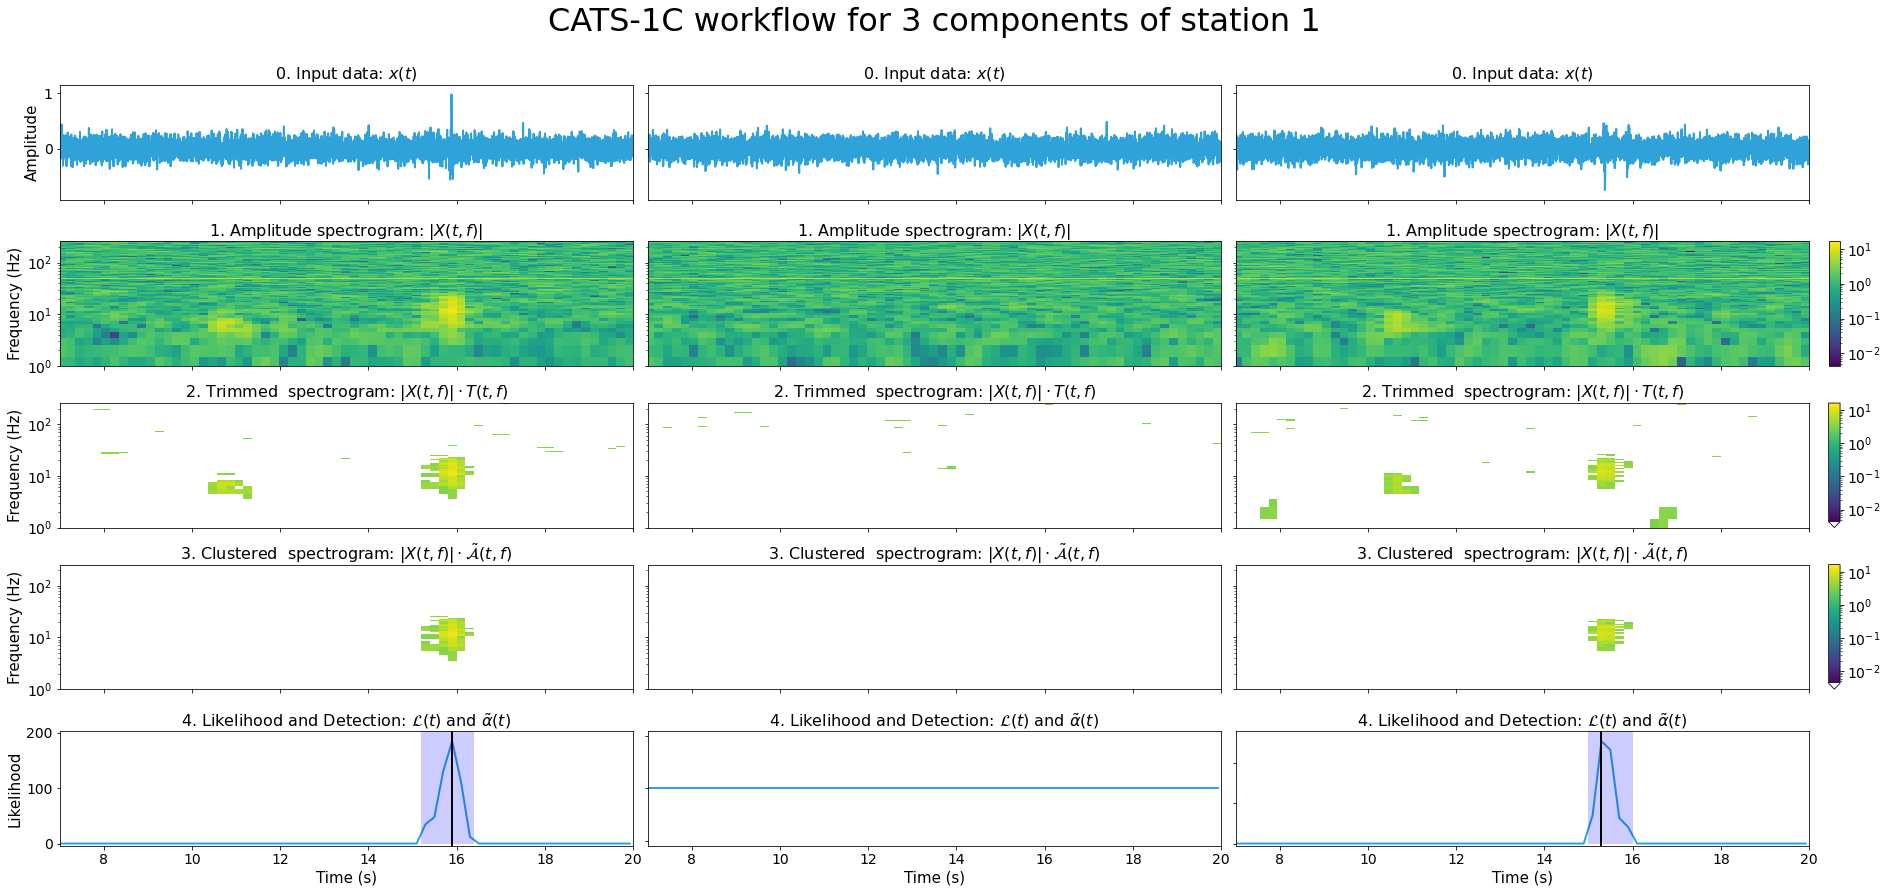

In [32]:
station = 1
fig = result_1C.plot_multi([(0, station), (1, station), (2, station)], 
                           time_interval_sec=(7, 20))
fig.opts(title=f"CATS-1C workflow for 3 components of station {station}", fontsize=dict(title=32))

:Layout
   .Curve.A_0_full_stop_Input_data_colon_x_left_parenthesis_t_right_parenthesis                                                                                                                                                                                                   :Curve   [Time]   (Amplitude)
   .QuadMesh.A_1_full_stop_Amplitude_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line                                                                                                                                                 :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_2_full_stop_Trimmed_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_T_left_parenthesis_t_comma_f_right_parenthesis                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_3_full_stop_Clustered_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_reverse_over_tilde_reverse_over_mathcal_left_curly_bracket_A_right_curly_bracket_left_parenthesis_t_comma_f_right_parenthesis :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.A_4_full_stop_Likelihood_and_Detection_colon_reverse_over_mathcal_left_curly_bracket_L_right_curly_bracket_left_parenthesis_t_right_parenthesis_and_reverse_over_tilde_left_curly_bracket_reverse_over_alpha_right_curly_bracket_left_parenthesis_t_right_parenthesis :Overlay
      .Curve.I      :Curve   [Time]   (Likelihood)
      .Rectangles.I :Rectangles   [Time,Likelihood,t2,l2]
      .VLine.I      :VLine   [Time,Likelihood]
      .VLine.II     :VLine   [Time,Likelihood]
   .Curve.I                                                                                                                                                                                                                                                                       :Curve   [Time]   (Amplitude)
   .QuadMesh.I                                                                                                                                                                                                                                                                    :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.II                                                                                                                                                                                                                                                                   :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.III                                                                                                                                                                                                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.I                                                                                                                                                                                                                                                                     :Overlay
      .Curve.I      :Curve   [Time]   (Likelihood)
      .Rectangles.I :Rectangles   [Time,Likelihood,t2,l2]
      .VLine.I      :VLine   [Time,Likelihood]
      .VLine.II     :VLine   [Time,Likelihood]
   .Curve.II                                                                                                                                                                                                                                                                      :Curve   [Time]   (Amplitude)
   .QuadMesh.IV                                                                                                                                                                                   
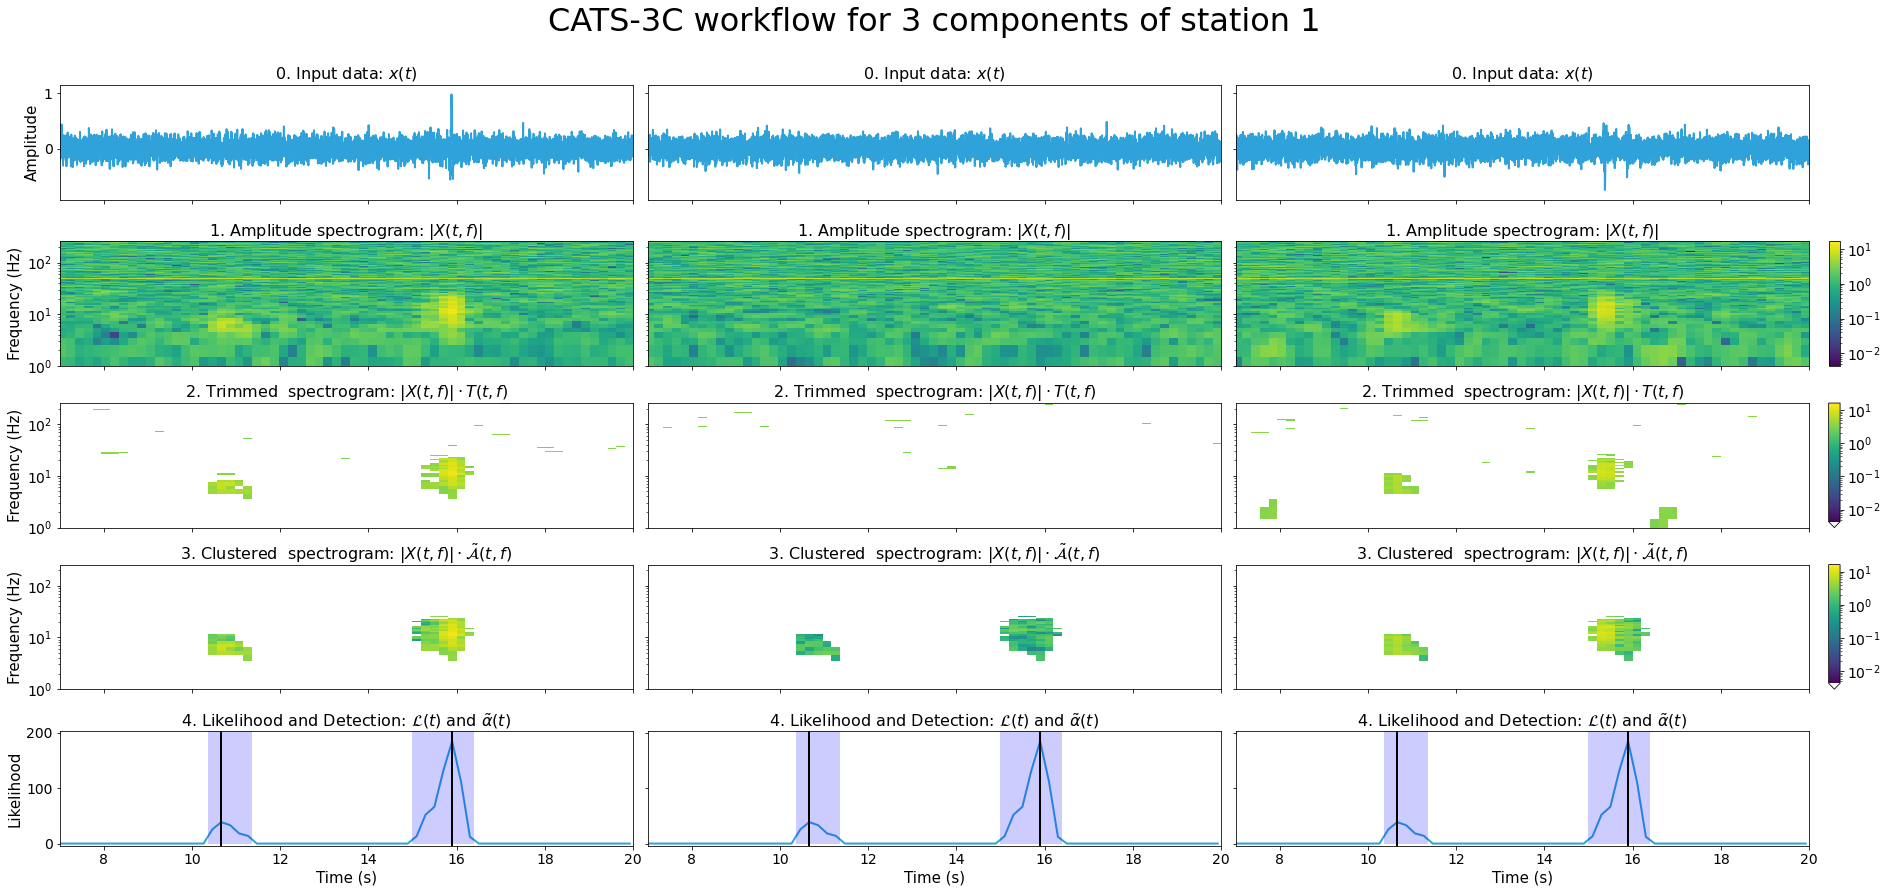

In [33]:
station = 1
fig = result_3C.plot_multi([(0, station), (1, station), (2, station)], 
                           time_interval_sec=(7, 20))
fig.opts(title=f"CATS-3C workflow for 3 components of station {station}", fontsize=dict(title=32))

We see that both events, especially at 11 sec, which is very weak, were detected because CATS used energy information from all components instead processing them individually. This also significantly simplifies the interpretation of the detected intervals, because CATS-3C produces single interval per station, unlike CATS-1C which gives separate results for each channel/component.

In [34]:
print("CATS-1C output shape:", result_1C.detected_intervals.shape)  # intervals are given for each component separately
print("CATS-3C output shape:", result_3C.detected_intervals.shape)  # intervals are given for all components jointly

CATS-1C output shape: (3, 10)
CATS-3C output shape: (1, 10)


We can plot the detected intervals of CATS-1C and CATS-3C, and compare them

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Rectangles.I :Rectangles   [Time,Station,x2,y2]
   .Points.Picks :Points   [Time,Station]
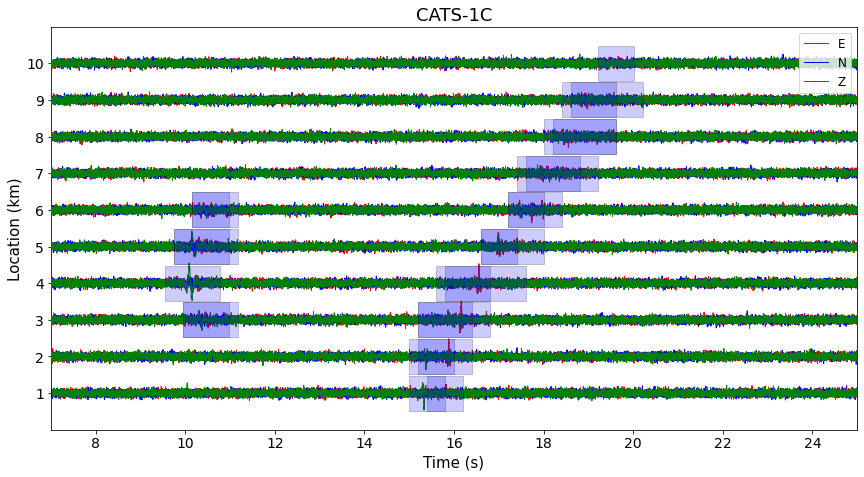

In [35]:
fig = result_1C.plot_traces(intervals=True, time_interval_sec=(7, 25), gain=0.3, alpha=0.2)
fig = fig.opts(ylabel='Location (km)', title='CATS-1C')
fig

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Rectangles.I :Rectangles   [Time,Station,x2,y2]
   .Points.Picks :Points   [Time,Station]
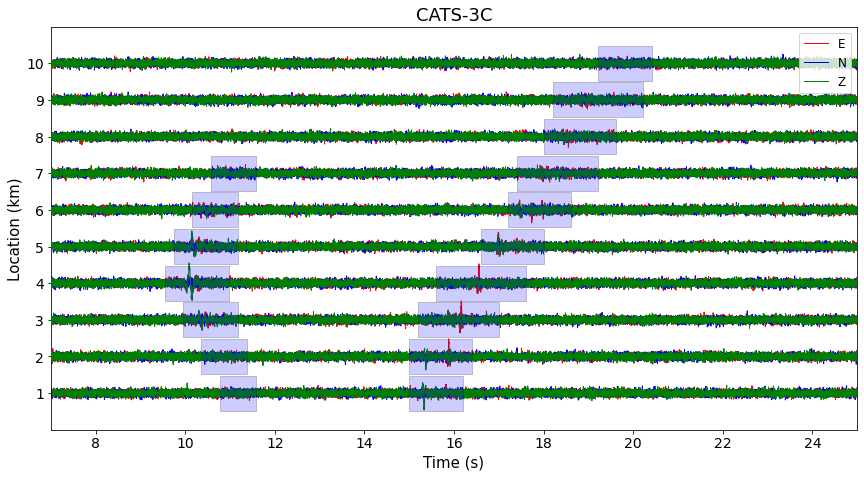

In [36]:
fig = result_3C.plot_traces(intervals=True, time_interval_sec=(7, 25), gain=0.3, alpha=0.2)
fig = fig.opts(ylabel='Location (km)', title='CATS-3C')
fig

The detected intervals CATS-3C are unified and generally wider, because the energy information was combined from the three components. **Note**, events around 11 sec were properly detected by CATS-3C, contrary to CATS-1C.

<hr>

#  Multi-trace detection and voting
<a id="mCATS"></a>

Sometimes, the data are given on a "regular" array of receivers and earthquakes on the array represent coherent signal. This coherence across multiple stations can be used to enhance the detection quality. Specifically, we can do clustering of spectrograms across multiple stations simultaneously `Trace x Time x Frequency`.

Here we show the multitrace detection on the same dataset to showcase the improvement of the performance.

In [37]:
detector_mt_1C = cats.CATSDetector(dt_sec=dt,
                                   stft_window_type='hann',
                                   stft_window_sec=1, 
                                   stft_overlap=0.8,
                                   minSNR=6.5,
                                   stationary_frame_sec=1000, 
                                   cluster_size_t_sec=0.2,
                                   cluster_size_f_Hz=10,
                                   cluster_distance_t_sec=0.2,
                                   cluster_distance_f_Hz=2,
                                   aggr_clustering_axis=None,  # We can combine CATS-3C and multi-trace detection!
                                   clustering_multitrace=True,  # now we set multitrace clustering as `True`
                                   cluster_size_trace=3,  # VOTING criterion: minimum number of stations to declare an event VOTING
                                   cluster_distance_trace=1,  # number of neighbor stations for association
                                   )

detector_mt_3C = cats.CATSDetector(dt_sec=dt,
                                   stft_window_type='hann',
                                   stft_window_sec=1, 
                                   stft_overlap=0.8,
                                   minSNR=6.5,
                                   stationary_frame_sec=1000, 
                                   cluster_size_t_sec=0.2,
                                   cluster_size_f_Hz=10,
                                   cluster_distance_t_sec=0.2,
                                   cluster_distance_f_Hz=2,
                                   aggr_clustering_axis=0,  # We can combine CATS-3C and multi-trace detection!
                                   clustering_multitrace=True,  # now we set multitrace clustering as `True`
                                   cluster_size_trace=3,  # VOTING criterion: minimum number of stations to declare an event VOTING
                                   cluster_distance_trace=1,  # number of neighbor stations for association
                                   )

Note, the `multitrace` clustering will be performed across the dimension of the input array which goes before the Time axis.

In [38]:
print(f"Input shape : {D.shape}")
print(f"Multitrace clustering will be done on {len(D.shape) - 2} axis with {D.shape[-2]} elements")
print(f"If we swapped axes of input data to {D.swapaxes(0, 1).shape}, \
then clustering would be done on {D.swapaxes(0, 1).shape[-2]} elements")

Input shape : (3, 10, 70000)
Multitrace clustering will be done on 1 axis with 10 elements
If we swapped axes of input data to (10, 3, 70000), then clustering would be done on 3 elements


In [39]:
result_mt_1C = detector_mt_1C ** D  # mCATS-1C
result_mt_3C = detector_mt_3C ** D  # mCATS-3C

1. STFT	...	Completed in 0.172 sec
2. B-E-DATE trimming	...	Completed in 0.0454 sec
3. Clustering	...	Completed in 0.0123 sec
4. Cluster catalog	...	Completed in 0.0307 sec
5. Projecting intervals	...	Completed in 0.0201 sec
Total elapsed time:	0.281 sec

1. STFT	...	Completed in 0.171 sec
2. B-E-DATE trimming	...	Completed in 0.0445 sec
3. Clustering	...	Completed in 0.0102 sec
4. Cluster catalog	...	Completed in 0.022 sec
5. Projecting intervals	...	Completed in 0.0183 sec
Total elapsed time:	0.266 sec



:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Rectangles.I :Rectangles   [Time,Station,x2,y2]
   .Points.Picks :Points   [Time,Station]
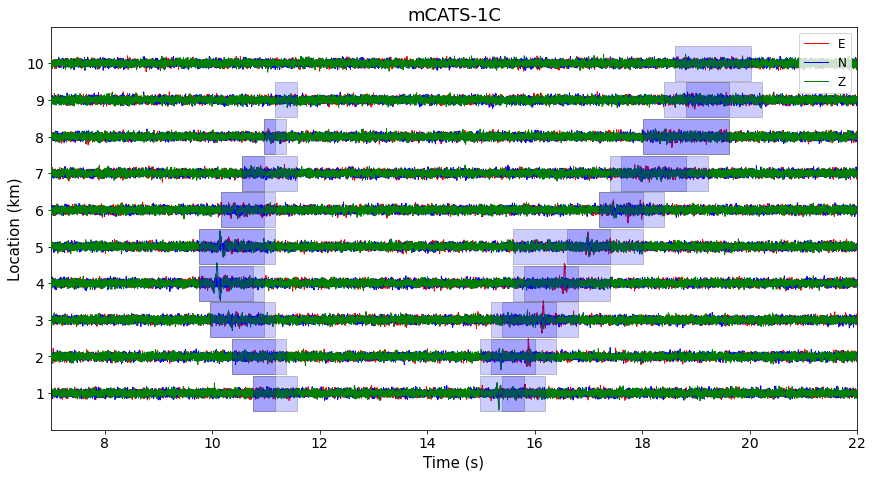

In [40]:
fig = result_mt_1C.plot_traces(intervals=True, time_interval_sec=(7, 22), gain=0.3, alpha=0.2)
fig = fig.opts(ylabel='Location (km)', title='mCATS-1C')
fig

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Rectangles.I :Rectangles   [Time,Station,x2,y2]
   .Points.Picks :Points   [Time,Station]
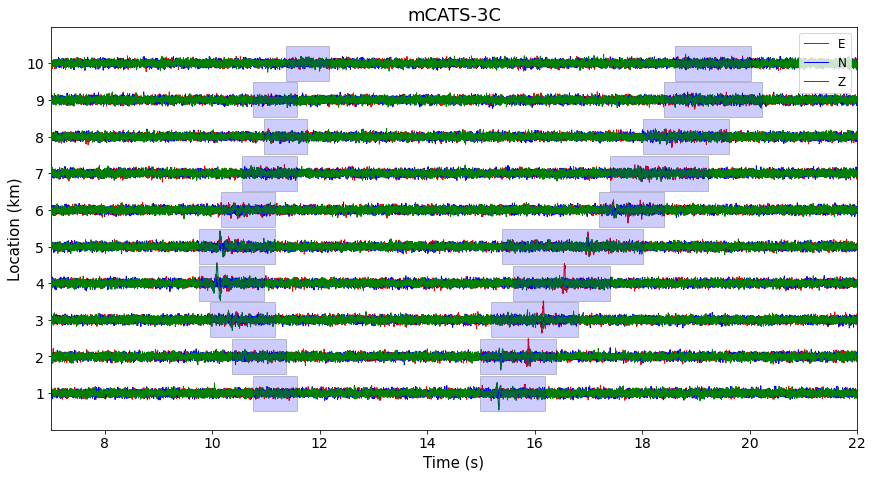

In [41]:
fig = result_mt_3C.plot_traces(intervals=True, time_interval_sec=(7, 22), gain=0.3, alpha=0.2)
fig = fig.opts(ylabel='Location (km)', title='mCATS-3C')
fig

<hr>

# Cluster catalogs
<a id="catalogs"></a>

Cluster catalogs is a dataframe of time-frequency attributes calculated by CATS.

It allows more detailed post-processing and quality control based on analysis of events' attrbiutes, which allow for more fine grained classification of detected clusters.

It allows:
- custom functions for arbitrary time-frequency attributes
- custom rules and criteria based on arbitrary attributes to filter out noise (e.g. `catalog.Frequency_peak_Hz > 5`):
    - automaticaly on-the-fly
    - manual post-processing

## Custom time-frequency attributes

Time-frequency attributes are calculated for **each cluster individually**.
If one wants to define their own custom function for attributes, it must follow the signature:

- it takes at least these four inputs: `(freq, time, values_dict, inds)`
- it returns dictionary of calculated attributes `{"my_attribute": scalar_or_array}`

In [42]:
def my_custom_attribute(freq, time, values_dict, inds, my_input='squared'):
    """
    freq - frequency values (Hertz), 1D array always, shape (N,)
    time - time values (seconds), 1D array always, shape (N, )
    values_dict - available time-frequency distributions, 1D array (N,) or 2D array (N_components, N) if 'aggr_clustering_axis' was set
    inds - indices of 'freq' and 'time' associated with their original array, 2D array (2, N), [freq_ind, time_inds]

    my_input - custom input parameter
    """

    # let's calculate energy volume in a window defined by standard deviation

    amplitudes = values_dict['spectrogram']  # it gives amplitude values, shape (3, N) as I use CATS-3C
    area = time.std() * freq.std()  # window of standard deviation 
    volume = area * amplitudes.mean()  # height is defined by average value among 3 components

    my_attribute = volume
    
    if my_input == 'squared':
        my_attribute = my_attribute**2

    return {"my_attribute": my_attribute}

## Custom filter of clusters

We can also define a function that filter events by custom attributes on-the-fly automatically:

In [43]:
def my_filter_func(catalog):  # the first argument is always 'catalog'
    # it must return a condition like below, which can be combined with other conditions
    return (catalog.Frequency_peak_Hz < 8) & (catalog.SNR_mean > 4)  # Only these event will be kept

In [44]:
from functools import partial

In [45]:
catalog_funcs = [cats.clustering.bbox_peaks,  # default, attributes defining bounding box and peak values of a cluster
                 partial(cats.clustering.calculate_moments, order=2, interpretable_only=True),
                 partial(my_custom_attribute, my_input='no')  # if attribute function has custom params like 'my_input'
                 # we can define them via `partial`
                 ]

detector3C = cats.CATSDetector(dt_sec=dt,
             stft_window_type='hann',
             stft_window_sec=1.0, 
             stft_overlap=0.8,
             minSNR=6,
             stationary_frame_sec=200,
             cluster_size_t_sec=0.2,
             cluster_size_f_Hz=8,
             cluster_distance_t_sec=0.2,
             cluster_distance_f_Hz=2,
             aggr_clustering_axis=0,  # we will use CATS-3C
             cluster_catalogs_funcs=catalog_funcs,  # list of all attribute funcs for the catalog
             cluster_feature_distributions=['spectrogram', 'spectrogram_SNR'],  # distributions that will be available
             cluster_catalogs_filter=my_filter_func,  # this func will filter out clusters
             )

In [46]:
result = detector3C ** D

1. STFT	...	Completed in 0.166 sec
2. B-E-DATE trimming	...	Completed in 0.0422 sec
3. Clustering	...	Completed in 0.00315 sec
4. Cluster catalog	...	Completed in 0.0304 sec
5. Projecting intervals	...	Completed in 0.0156 sec
Total elapsed time:	0.257 sec



In [47]:
result.cluster_catalogs

Event_ID  Cluster_ID  Time_centroid_sec  \
Component Station                                            
0         0               1           1          52.789102   
          0               2           2          11.139338   
          1               1           1          52.492933   
          1               2           2          10.777330   
          2               1           1          52.218985   
          2               2           2         124.126766   
          2               3           3          10.450701   
          3               1           1          51.656223   
          3               2           2          10.159131   
          3               3           3         124.042722   
          4               1           1          51.210643   
          4               2           2         123.646292   
          4               3           3          10.293607   
          5               1           1          50.956904   
          5               2           2         123.486792   
          5               3           3          10.590552   
          6               1           1          50.618549   
          6               2           2         123.230504   
          6               3           3          10.955125   
          7               1           1          50.308340   
          7               2           2         122.938959   
          8               1           1          49.895334   
          8               2           2         123.213875   
          9               1           1          50.367069   
          9               2           2         123.473081   

                   Time_Frequency_covar  Time_std_sec  Time_start_sec  \
Component Station                                                       
0         0                   -0.115922      0.547290       51.816103   
          0                   -0.036972      0.199487       10.767424   
          1                   -0.178112      0.503873       51.614878   
          1                   -0.179758      0.244915       10.365041   
          2                   -0.342314      0.671912       51.212429   
          2                    0.046014      0.504031      123.452361   
          2                   -0.154282      0.240539        9.962664   
          3                   -0.174033      0.466642       50.407531   
          3                   -0.045626      0.220164        9.560292   
          3                    0.121887      0.667292      123.049909   
          4                   -0.134515      0.419000       50.005082   
          4                    0.125591      0.448271      122.848683   
          4                   -0.076704      0.268354        9.761477   
          5                   -0.000856      0.390338       49.803858   
          5                    0.054633      0.711103      122.647458   
          5                    0.101482      0.233682       10.163852   
          6                    0.043480      0.420960       49.602633   
          6                    0.038368      0.472881      122.446232   
          6                   -0.246427      0.256774       10.566232   
          7                    0.062832      0.442401       49.401409   
          7                   -0.015908      0.281291      122.446232   
          8                   -0.038077      0.283441       49.401409   
          8                    0.036073      0.488773      122.446232   
          9                    0.035662      0.465650       49.401409   
          9                    0.024139      0.704665      122.446232   

                   Time_end_sec  Time_peak_sec  Frequency_centroid_Hz  \
Component Station                                                       
0         0           54.230055      52.520006               6.032063   
          0           11.568765      11.067434               7.220021   
          1           53.827600      52.318780               5.568780   
       

In [48]:
result.cluster_catalogs.loc[0, 5]

Event_ID  Cluster_ID  Time_centroid_sec  \
Component Station                                            
0         5               1           1          50.956904   
          5               2           2         123.486792   
          5               3           3          10.590552   

                   Time_Frequency_covar  Time_std_sec  Time_start_sec  \
Component Station                                                       
0         5                   -0.000856      0.390338       49.803858   
          5                    0.054633      0.711103      122.647458   
          5                    0.101482      0.233682       10.163852   

                   Time_end_sec  Time_peak_sec  Frequency_centroid_Hz  \
Component Station                                                       
0         5           52.217780      51.111423               5.452649   
          5          126.269202     123.150358               5.160733   
          5           11.166251      10.463756               7.469120   

                   Frequency_std_Hz  ...  Ellipse_angle  Ellipse_eccentricity  \
Component Station                    ...                                        
0         5                2.379793  ...      -0.000155              0.999638   
          5                1.683881  ...       0.023433              0.984066   
          5                2.276899  ...       0.019773              0.999949   

                   Energy_peak  Energy_mean     SNR_sum   SNR_mean   SNR_peak  \
Component Station                                                               
0         5          38.070206    12.079211  881.782410  12.079211  38.070206   
          5          45.917828    12.211625  867.025391  12.211625  45.917828   
          5          17.399834     8.063495  314.476288   8.063495  17.399834   

                   Interval_ID  Interval_start_sec  Interval_end_sec  
Component Station                                                     
0         5                  2           49.803454         52.218167  
          5                  3          122.647293        126.269362  
          5                  1           10.161917         11.168047  

[3 rows x 31 columns]

In [49]:
result.cluster_catalogs.my_attribute

Component  Station
0          0           2.674441
           0           0.993039
           1           3.788955
           1           1.825567
           2           6.303616
           2           4.862156
           2           3.460850
           3           5.671872
           3           6.182938
           3           6.733097
           4           7.906062
           4           6.589115
           4           5.403295
           5           7.483561
           5          10.584249
           5           2.538067
           6           7.530071
           6           8.681159
           6           1.569573
           7           6.105296
           7           6.614990
           8           3.886960
           8           8.757021
           9           6.573320
           9          10.884612
Name: my_attribute, dtype: float64

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Rectangles.I :Rectangles   [Time,Station,x2,y2]
   .Points.Picks :Points   [Time,Station]
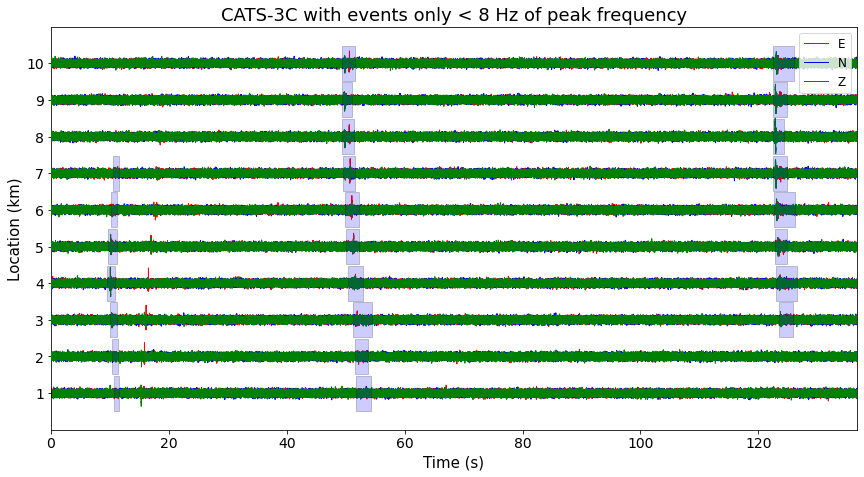

In [50]:
fig = result.plot_traces(intervals=True, gain=0.3, alpha=0.2)
fig = fig.opts(ylabel='Location (km)', title='CATS-3C with events only < 8 Hz of peak frequency')
fig

We can notice how one event around 15-20 seconds was eliminated because it does not satisfy our custom filtering condition.

# Pre-tuned CATS models

There are a few models with pre-tuned parameters, whic are not necessarily best for arbitrary data, but may be a good starting point.

To get a pre-tuned CATS, follow the instruction below:

In [51]:
cats_pretuned = cats.load_pretuned_CATS(
    mode='detector',  # 'detector' or 'denoiser'
    multitrace=False,  # True or False
    time_frequency_base='STFT',  # STFT or CWT
)

Successfully loaded a pre-tuned CATS from c:\users\seraf\dropbox\github\cats\cats\data\pretuned\detector_CATS.pickle
